In [ ]:
%%shell
pip install pytorch_lightning
# gdown -O ./CNN_mask_detect.py https://drive.google.com/uc?id=1NeoL7nWDWImzyveiirovHIp367P1jyAn
# gdown -O ./weight.ckpt https://drive.google.com/uc?id=1tce1L_Eo8t7nrPgkVLgp6OcHoE3nVGxg
# gdown -O ./weight_resnet.pt  https://drive.google.com/uc?id=1FFpEPa8PYkozCL_xzTiuAtXto09_xv2M
# gdown -O ./weight_resnet_rblur.pt https://drive.google.com/uc?id=1PRaYWlmE7Jm5z-7FvOScaAEBnPWQHFzI
# gdown -O ./weight_resnet_2resize.pt https://drive.google.com/uc?id=17k2NnRmerjxvP9B-PvgQ0a2GD-k2z1P4
# gdown -O ./weight_mobilenet.pt https://drive.google.com/uc?id=1yZpYGe42pkiUSywVPvYjWdfZWEKr9vL3
# gdown -O ./model_test_scheduler_big.pt https://drive.google.com/uc?id=1Or-eVcIJEtzqGaXXCFxlt6GcBqW91IfY
# gdown -O ./model_test_scheduler_small.pt https://drive.google.com/uc?id=1hZH2RzXkLlQCSB3nZw_BjSE6jcLaUgwZ
gdown -O ./model_test_full_big.pt https://drive.google.com/uc?id=1MTcyh-5TXZtfP9JYA1S9jKcyBOo8bdgx
gdown -O ./model_test_full_small.pt https://drive.google.com/uc?id=1TTpMUQgpgjqHGOSLCow0of_EHxNPHAAM

     |████████████████████████████████| 675kB 13.5MB/s 
     |████████████████████████████████| 92kB 13.2MB/s 
     |████████████████████████████████| 276kB 46.7MB/s 
     |████████████████████████████████| 829kB 43.9MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44620 sha256=d731386607453ea79492cd6010887c3425a1dbc7db4c5e388b76f044fa42a639
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=318fae338fdd1bc0c73a4111960e5f8deb4787b0e1c68d2bc96d31b233fb9fd8
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built PyYAML future
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully unin

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import torch
import torch.nn as nn
from PIL import Image
# from CNN_mask_detect import *
from math import *
from google.colab.patches import cv2_imshow

# 1. Install Packages

In [ ]:
%%shell
pip install cython
pip install -U "git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI"
pip install gdown
gdown https://drive.google.com/uc?id=1tria-PospU3iER9gDb9mgahXWw_ZxBF9
unzip face_images_data.zip
pip install facenet-pytorch

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-t8hvpdef
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-t8hvpdef
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266455 sha256=76117ab5988f9556f716d099bef732e97506d8b28bbf7f6f2b8d93b3a6700fde
  Stored in directory: /tmp/pip-ephem-wheel-cache-bdrphby9/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully uninstalled pycocotools-2.0.2
Downloading...
From: https://drive.google.com/uc?id=1tria-PospU3iER9gDb9mgahXWw_ZxBF9
To: /content/face_images_data.zip
172MB [00:01, 136MB/s]
Archive:  face_images_data.zip
   creating: face_images/
  inflating: __MACOSX/._face_images  
  inflating: face_images/img_103.png  
  inflating: face_images/img_117.png  
  inflating: face_images/img_10.png  

In [ ]:
%%shell
# Download TorchVision repo to use some files from
# references/detection
git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.3.0

cp references/detection/utils.py ../
cp references/detection/transforms.py ../
cp references/detection/coco_eval.py ../
cp references/detection/engine.py ../
cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 12177 (delta 49), reused 34 (delta 16), pack-reused 12086
Receiving objects: 100% (12177/12177), 13.49 MiB | 21.26 MiB/s, done.
Resolving deltas: 100% (8491/8491), done.
Note: checking out 'v0.3.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at be37608 version check against PyTorch's CUDA version


In [ ]:
import os
import torchvision
import utils
import transforms as T
from torchvision import datasets
from facenet_pytorch import MTCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torch.nn import Softmax, Dropout, Linear
from torchvision import models
from torchvision.transforms import Compose, Resize, ToPILImage, ToTensor, CenterCrop, Normalize

In [ ]:
%%shell
if [ -d './faces' ]
then
  rm -r ./faces
fi

mkdir ./faces
cp -r ./face_images ./faces/unmasked
cp -r ./mask_images ./faces/masked

In [ ]:
%%shell
gdown -O model_params.pt https://drive.google.com/uc?id=1-6q0OcEfnkXU1zx5_DS25vR1pk9XauCG
gdown -O ./fourth_round.pt https://drive.google.com/uc?id=1-XPlkknOdGJEtWK2-r--jfDbD2-PzhZT

Downloading...
From: https://drive.google.com/uc?id=1-6q0OcEfnkXU1zx5_DS25vR1pk9XauCG
To: /content/model_params.pt
176MB [00:04, 41.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-XPlkknOdGJEtWK2-r--jfDbD2-PzhZT
To: /content/fourth_round.pt
12.3MB [00:00, 57.6MB/s]


# 2. Loading the Dataset and the Models

In [ ]:
dataset_faces = datasets.ImageFolder("./faces", transform=torchvision.transforms.ToTensor())
len(dataset_faces)

912

In [ ]:
H_all, W_all = 248, 173

class ImageEncoder(nn.Module):
  def __init__(self, H_all=H_all, W_all=W_all, num_res=4):
    super(ImageEncoder, self).__init__()
    self.H_all = H_all
    self.W_all = W_all
    self.num_res = num_res

    self.res_block1 = self.make_res_block_(3, 16, 16)
    self.conv1 = nn.Conv2d(3, 16, 1, bias=False)
    self.relu1 = nn.ReLU()
    self.maxpool1 = nn.MaxPool2d(2, 2)

    self.res_block2 = self.make_res_block_(16, 32, 32)
    self.conv2 = nn.Conv2d(16, 32, 1, bias=False)
    self.relu2 = nn.ReLU()
    self.maxpool2 = nn.MaxPool2d(2, 2)

    self.res_block3 = self.make_res_block_(32, 64, 64)
    self.conv3 = nn.Conv2d(32, 64, 1, bias=False)
    self.relu3 = nn.ReLU()
    self.maxpool3 = nn.MaxPool2d(2, 2)

    self.res_block4 = self.make_res_block_(64, 128, 128)
    self.conv4 = nn.Conv2d(64, 128, 1)
    self.relu4 = nn.ReLU()
    self.maxpool4 = nn.MaxPool2d(2, 2)

    self.res_blocks = [(self.res_block1, self.conv1, self.relu1, self.maxpool1),
                       (self.res_block2, self.conv2, self.relu2, self.maxpool2),
                       (self.res_block3, self.conv3, self.relu3, self.maxpool3),
                       (self.res_block4, self.conv4, self.relu4, self.maxpool4)]


  def make_res_block_(self, in_dims, out_dims, num_features):
    return nn.Sequential(
        nn.Conv2d(in_dims, out_dims, 3, bias=False, padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dims, out_dims, 3, bias=False, padding=1),
        nn.BatchNorm2d(num_features)
    )
  
  def forward(self, X):
    for i in range(self.num_res):
      X = self.res_block_forward_(X, *self.res_blocks[i])
    return X

  def res_block_forward_(self, X, res_block, conv, activation, pool):
    identity = X
    X = res_block(X)
    return pool(activation(X + conv(identity)))


class CNNRegressor(nn.Module):
  def __init__(self, H_all=H_all, W_all=W_all, num_res=4):
    super(CNNRegressor, self).__init__()
    self.img_encoder = ImageEncoder(H_all, W_all, num_res)
    self.mask_encoder = ImageEncoder(H_all, W_all, num_res)
    H4, W4 = H_all // 16, W_all // 16
    self.reshaper = nn.Conv2d(128, 128, (H4, W4), bias=False)
    self.fc = nn.Sequential(
        nn.Conv2d(128, 16, 1),
        nn.ReLU()
    )
    self.out = nn.Conv2d(16, 2, 1)
  
  def forward(self, img, mask):
    img = self.img_encoder(img)
    mask = self.mask_encoder(mask)
    X = img * mask
    X = self.reshaper(X)
    X = self.fc(X)
    out = self.out(X)
    return out

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model_face = CNNRegressor().to(device)
model_face.load_state_dict(torch.load("./fourth_round.pt"))
model_face = model_face.eval()

In [ ]:
def get_model_instance_segmentation(num_classes):
  model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

  in_features = model.roi_heads.box_predictor.cls_score.in_features
  model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

  in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
  hidden_layer = 256
  model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

  return model

In [ ]:
num_classes = 2
model_detect = get_model_instance_segmentation(num_classes)
model_detect.load_state_dict(torch.load("./model_params.pt"))

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


<All keys matched successfully>

In [ ]:
model_detect.eval()
model_detect = model_detect.to(device)

In [ ]:
model_face_mtcnn = MTCNN(keep_all=True, device=device, thresholds=[0.35, 0.35, 0.4], 
                   min_face_size=5, margin=5)  # this "thresholds" can be further tuned
# model_face_mtcnn = MTCNN(keep_all=True, device=device, min_face_size=5, margin=5)
model_face_mtcnn = model_face_mtcnn.eval()

## **mask detection model definition**

In [ ]:
mobilemodel = models.mobilenet_v2(pretrained=True)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


In [ ]:
# based on DCGAN's upsampling part: 
# https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

class UpSampler(nn.Module):
  def __init__(self, size_grads=[14,28], in_channels=3, 
               num_features_init=8, tgt_size=224):
    # assert tgt_size == size_grads[-1] * 2, "wrong size_grads or tgt_dim"

    super(UpSampler, self).__init__()
    self.size_grads = size_grads
    self.tgt_size = tgt_size
    self.channel_increasers = nn.ModuleList()
    self.layers = nn.ModuleList()

    next_channels = in_channels
    cur_channels = num_features_init

    for _ in range(len(size_grads)):
      self.layers.insert(0, self.make_transpose_conv_block(cur_channels, 
                                                        next_channels))
      self.channel_increasers.insert(0, nn.Conv2d(in_channels, cur_channels, 1, 1, 
                                                  bias=False))
      next_channels = cur_channels
      cur_channels *= 2
    
  
  def make_transpose_conv_block(self, in_channels, out_channels):
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, 4, 2, 1, bias=False),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()
    )
  
  def forward(self, X):
    _, _, H, W = X.shape
    assert H == W, "H is not equal to W"
    if H == self.tgt_size:
      return X
    
    if max(self.size_grads) < 40: # small face model
      ind = self.size_grads.index(H/4)
    else:
      ind = self.size_grads.index(H) # large face model
    X = self.channel_increasers[ind](X)
    for i in range(ind, len(self.layers)):
      X = self.layers[i](X)
    
    return X

In [ ]:
class MaskModel(nn.Module):
  def __init__(self, size_grads=[14,28], in_channels=3, 
               num_features_init=8, tgt_size=224):
    super(MaskModel, self).__init__() # tgt_size is the input of the original model, 
                                      # e.g., ResNet, MobileNet, &etc.
    self.upsampler = UpSampler(size_grads=size_grads, in_channels=in_channels, 
                               num_features_init=num_features_init, 
                               tgt_size=tgt_size)
    
    ## TODO: replace the main network below
    # self.resizer = nn.Conv2d(in_channels, in_channels, tgt_size, 1)
    # self.fc = nn.Conv2d(in_channels, 2, 1, 1) # (B, 2, 1, 1)
    # self.out = nn.Softmax(dim=1)
    base_model = mobilemodel
    for param in base_model.parameters():
      param.requires_grad = False
    new_model = nn.Sequential(nn.Linear(in_features=1280, out_features=128),
                       nn.Dropout(p=0.5),
                       nn.Linear(in_features=128,out_features=2))
    base_model.classifier = new_model
    self.classifier = base_model
    # self.out = nn.Softmax(dim=1)
    ## end TODO

  def forward(self, X):
    X = self.upsampler(X)
    # X = self.resizer(X)
    # X = self.fc(X)
    X = self.classifier(X)
    if X.shape[0]!=1:
      X = X.squeeze()
    # X = self.out(X)

    return X

In [ ]:
#model_mask = MaskDetector()
#model_mask.load_state_dict(torch.load("weight.ckpt")['state_dict'], strict=False)
# model_mask = models.resnet50(pretrained=True)
# num_ftrs = model_mask.fc.in_features
# model_mask.fc = Linear(num_ftrs,2)
# base_model = models.mobilenet_v2(pretrained=True)
# new_model = Sequential(Linear(in_features=1280, out_features=128),
#                       Dropout(p=0.5),
#                       Linear(in_features=128,out_features=2))
# base_model.classifier = new_model
# model_mask_1 = base_model
# model_mask_1.load_state_dict(torch.load("weight_mobilenet.pt"), strict=False)
# model_mask_1 = model_mask_1.to(device)
new_model = MaskModel(size_grads=[56,112])
new_model.load_state_dict(torch.load("./model_test_full_big.pt"))
large_face = new_model
large_face = large_face.to(device)
large_face.eval()

MaskModel(
  (upsampler): UpSampler(
    (channel_increasers): ModuleList(
      (0): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): Conv2d(3, 8, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (layers): ModuleList(
      (0): Sequential(
        (0): ConvTranspose2d(16, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): Sequential(
        (0): ConvTranspose2d(8, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
  )
  (classifier): MobileNetV2(
    (features): Sequential(
      (0): ConvBNReLU(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [ ]:
# load another mask_detection model
# model_mask_2 = models.resnet50(pretrained=True)
# num_ftrs = model_mask_2.fc.in_features
# model_mask_2.fc = Linear(num_ftrs,2)
# model_mask_2.load_state_dict(torch.load("weight_resnet.pt"), strict=False)
# model_mask_2 = model_mask_2.to(device)
# model_mask_2.eval()
new_model = MaskModel(size_grads=[14,28])
new_model.load_state_dict(torch.load("./model_test_full_small.pt"))
small_face = new_model
small_face = small_face.to(device)
small_face.eval()

MaskModel(
  (upsampler): UpSampler(
    (channel_increasers): ModuleList(
      (0): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): Conv2d(3, 8, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (layers): ModuleList(
      (0): Sequential(
        (0): ConvTranspose2d(16, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): Sequential(
        (0): ConvTranspose2d(8, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
  )
  (classifier): MobileNetV2(
    (features): Sequential(
      (0): ConvBNReLU(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

# 3. Defining Classes

In [ ]:
A = np.random.rand(3, 4)
# A_expanded = np.concatenate([A, A, A], axis=-1)
A_expanded = np.tile(A, (3, 4, 3))
A_expanded.shape

(3, 12, 12)

In [ ]:
class Person(object):
  def __init__(self, box, mask, frame, score, label, model_face, 
               model_mtcnn=model_face_mtcnn, 
               model_mask=[large_face,small_face], frame_orig=None):
    """
    Inputs:
      box: (4,) ndarray, [xmin, ymin, xmax, ymax], in the entire frame
           x: ---> (horizontal, left: 0)
           y: |
              |
              | (vertical, top: 0)
      
      mask: (N, H) ndarray
      frame: ndarray, the entire image, of shape (H, W, C) 
      score: score from the human detection model
      label: 0: masked, 1: unmasked
      model_face: face detection model    
    """
    # plt.imshow(frame)
    # plt.show()
    self.box = box
    # print(box)
    self.mask_orig = mask
    _, self.mask = cv.threshold((mask * 255).astype(np.uint8), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    self.mask = (self.mask / 255).astype(np.float32)
    self.frame = frame
    self.frame_orig = frame_orig
    self.score = score
    self.label = label
    self.pos = np.array([(self.box[0] + self.box[2]) / 2, self.box[3]])
    self.model_face = model_face
    self.model_mtcnn = model_mtcnn
    self.model_mask = model_mask
    self.face_loc = None  # global face location
    # self.prob = None
    self.face_loc_slice = None  # local face location
    self.face_loc_slice, self.face_loc = self.detect_face()
    self.prob_mask = self.detect_mask()

  def predict_(self, img, mask, anchor_x, anchor_y):
    """
    Inputs:
      img, mask: ndarray, (H, W, C)
    Outputs:
      x, y: float
    """
    self.model_face.eval()
    with torch.no_grad():
      img = img.transpose(2, 0, 1).astype(np.float32)
      mask_all = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.float32)
      for c in range(mask_all.shape[-1]):
        mask_all[:, :, c] = mask
      mask = mask_all.transpose(2, 0, 1).astype(np.float32)
      img_T = torch.tensor(img, device=device).unsqueeze(0)
      mask_T = torch.tensor(mask, device=device).unsqueeze(0)

      pred = self.model_face(img_T, mask_T)
      pred_x, pred_y = pred[:, 0, ...], pred[:, 1, ...]

      return pred_x.squeeze().item() + anchor_x, pred_y.squeeze().item() + anchor_y

  def predict_raw_img_(self, img, mask, H_all=248, W_all=173, if_plot=False):
    """
    Inputs:
      img, mask: ndarray, dtype is np.float32
    Outputs:
      x1, y1, x2, y2: int, locs of the bounding box
    """
    H, W = img.shape[:2]
    anchor_x, anchor_y = W_all / 2, H_all / 2
    img_resized = cv.resize(img, (W_all, H_all))
    mask_resized = cv.resize(mask, (W_all, H_all))
    pred_x, pred_y = self.predict_(img_resized, mask_resized, anchor_x, anchor_y)
    x, y = pred_x / W_all * W, pred_y / H_all * H
    y = int(y)

    # mask_gray = (cv.cvtColor(mask, cv.COLOR_BGR2GRAY) * 255).astype(np.uint8)
    mask_gray = (mask * 255).astype(np.uint8)
    _, mask_th = cv.threshold(mask_gray[:y, :], 0, 255, 
                              cv.THRESH_BINARY + cv.THRESH_OTSU)
    # mask_upper = (mask_th[:y, :] / 255).astype(np.float32)
    mask_upper = (mask_th / 255).astype(np.float32)
    # plt.imshow(mask_upper, cmap="gray")
    # plt.show()
    inds = np.argwhere(mask_upper > 0)
    yy, xx = inds[:, 0], inds[:, 1]
    # for x_iter in xx:
    #   print(x_iter)
    # print(xx.min())
    y_min, y_max = yy.min(), y
    x_min, x_max = xx.min(), xx.max()

    if if_plot:
      # plt.imshow(mask_th, cmap="gray")
      # plt.show()
      img_c = img.copy()
      img_c = cv.rectangle(img_c, (x_min, y_min), (x_max, y_max), 
                          color=(0, 0, 255), thickness=2)
      plt.imshow(cv.cvtColor(img_c, cv.COLOR_BGR2RGB))
      plt.show()

    return x_min, y_min, x_max, y_max
  

  def IOU_(self, box1, box2):
    if box1[2] < box2[0] or box2[2] < box1[0]:
      return 0
    elif box1[3] < box2[1] or box2[3] < box1[1]:
      return 0
    xx = sorted([box1[0], box1[2], box2[0], box2[2]])
    yy = sorted([box1[1], box1[3], box2[1], box2[3]])
    intersection = (xx[2] - xx[1]) * (yy[2] - yy[1])
    union = abs((box1[0] - box1[2]) * (box1[1] - box1[3])) + \
    abs((box2[0] - box2[2]) * (box2[1] - box2[3])) - intersection
    return intersection / union
  
  def detect_face(self, if_plot=True, th=0.35, tol=0.15, tol_half=0.4):
    """
    Inputs:
      model_face: face detection model
      offset: (2,) ndarray, (xmin, ymin) of the large bounding box(in the entire frame)
      if_plot: bool, whether to plot the person, including an original slice, a slice with face detection, 
               and the mask

    Outputs:
      box: (4,) ndarray, face loc in the person slice image
      face_loc: (4,) ndarray, [xmin, ymin, xmax, ymax] in the entire scene (offset has been added)
      prob: (1,) ndarray, the probability of the face
    """
    model_face = self.model_face
    box = self.box.astype(np.int)
    offset = box[:2]
    slice_fr = self.frame[box[1] : box[3], box[0] : box[2], :]
    slice_mask = self.mask_orig[box[1] : box[3], box[0] : box[2]]
    x_min, y_min, x_max, y_max = self.predict_raw_img_(slice_fr, slice_mask)
    local_face = np.array([x_min, y_min, x_max, y_max])
    global_face = local_face + np.array([offset[0], offset[1], offset[0], offset[1]])

    slice_fr = self.frame[box[1] : box[3], box[0] : box[2], :].transpose((2, 0, 1))
    tensor = torch.tensor(slice_fr)

    with torch.no_grad():
      trans = torchvision.transforms.ToPILImage()
      img_PIL = trans(tensor)

      # img_plot = np.array(img_PIL)
      # plt.imshow(img_plot)
      # plt.show()

      box, prob = None, None
      try:
        box, prob = self.model_mtcnn.detect(img_PIL)
      except RuntimeError as e:
        print("Runtime error!")
        img_plot = np.array(img_PIL)
        plt.imshow(img_plot)
        plt.show()
        return local_face, global_face

      #print(f"box: {box}, prob: {prob}")
      if prob is None or box is None:
        return local_face, global_face
      else:
        ind = np.argmax(prob)
        # box = box[ind : ind + 1, :]
        # prob = prob[ind : ind + 1]
        box = box[ind, :]
        prob = prob[ind]
        if prob < th:
          return local_face, global_face
        # elif box[1] >= local_face[3] - (local_face[3] - local_face[1]) * tol:
        elif self.IOU_(box, local_face) < tol:
          return local_face, global_face
        elif box[3] < local_face[3] - (local_face[3] - local_face[1]) * tol_half:
          return local_face, global_face
        else:
          face_loc = box + np.array([offset[0], offset[1], offset[0], offset[1]])
          return box, face_loc
    
  def detect_mask(self):
    # detect whether the face is wearing a mask
    box = self.box.astype(np.int)
    people_size = abs(box[2]-box[0])*abs(box[3]-box[1])
    # model_mask.eval()
    # prepare face slice data
    global_face_loc = (self.face_loc).astype(np.int)
    box = global_face_loc
    face_size = abs(box[2]-box[0])*abs(box[3]-box[1])
    # if (face_size/people_size > 1):
    #  model_mask = self.model_mask[1]
    #  use_soft = True
    # else:
    #   model_mask = self.model_mask[0]
    #  use_soft = False
    # print(global_face_loc)
    img = self.frame_orig
    face_slice = img[global_face_loc[1]:global_face_loc[3], global_face_loc[0]:global_face_loc[2],:]
    # face_slice = np.floor(face_slice * 255).astype(np.uint8)
    face_slice = face_slice.astype(np.uint8)

    size_grads = [14,28,56,112,224]
    def argmin_dist(img_size) -> int:
      H, W = img_size
      min_dist = 2 ** 32
      out_size = None

      for size_cand in size_grads:
        cur_dist = abs(H - size_cand) + abs(W - size_cand)
        if min_dist > cur_dist:
          out_size = size_cand
          min_dist = cur_dist
      
      return out_size

    if min(face_slice.shape[:2]) < 40:
     out_size = 4*argmin_dist(face_slice.shape[:2])
     model_mask = self.model_mask[1] # use small face model
    else:
     out_size = argmin_dist(face_slice.shape[:2])
     model_mask = self.model_mask[0] # use big face model

    # out_size = argmin_dist(face_slice.shape[:2])
    # if out_size==14 or out_size==28:
    #   # model_mask = self.model_mask[1] # use small face model
    #   out_size = 4*out_size
    # else:
    #   # model_mask = self.model_mask[0] # use large face model
    #   out_size = out_size
    # model_mask = self.model_mask[0] # use large face model only

    transformations = Compose([
      ToPILImage(),
      ToTensor(),
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
      Resize((out_size, out_size))
    ])
    
    # transformations = Compose([
    #        ToPILImage(),
    #        Resize(256),
    #        CenterCrop(224),
    #        ToTensor(),
    #        Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
    # ])
    # soft = Softmax()
    # if use_soft:
    #  prob_mask = soft(model_mask(transformations(face_slice).unsqueeze(0).to(device)))[0,1] # probability of wearing a mask
    #else:
    # soft = nn.Softmax(dim=1)
    soft = nn.LogSoftmax(dim=1)
    prob_mask = soft(model_mask(transformations(face_slice).unsqueeze(0).to(device)))[0,1]
    prob_mask = prob_mask.data.cpu().numpy()
    #print(prob_mask)
    return np.exp(prob_mask)

In [ ]:
def IOU(box1, box2):
    if box1[2] < box2[0] or box2[2] < box1[0]:
      return 0
    elif box1[3] < box2[1] or box2[3] < box1[1]:
      return 0
    xx = sorted([box1[0], box1[2], box2[0], box2[2]])
    yy = sorted([box1[1], box1[3], box2[1], box2[3]])
    intersection = (xx[2] - xx[1]) * (yy[2] - yy[1])
    union = abs((box1[0] - box1[2]) * (box1[1] - box1[3])) + \
    abs((box2[0] - box2[2]) * (box2[1] - box2[3])) - intersection
    return intersection / union

IOU(np.array([1, 2, 3, 4]), np.array([2, 1, 4, 3]))

0.14285714285714285

In [ ]:
class Frame(object):
  # This class is for video analysis
  def __init__(self, img, label, model_detect, model_face, th1=0.5, frame_orig=None):
    """
    Inputs:
      img: ndarray, input frame
    """
    self.frame = img
    self.frame_orig = frame_orig
    self.label = label
    self.th1 = th1
    self.model_detect = model_detect
    self.model_face = model_face
    self.people = self.detect_people(False)
    self.frame_out = None
    self.mask_score = []
    self.face_proportion = []

  
  def detect_people(self, if_plot=True):
    model = self.model_detect
    model.eval()
    with torch.no_grad():
      img = torch.tensor(self.frame.transpose(2, 0, 1))
      preds = model([img.to(device)])
      boxes = preds[0]["boxes"].cpu()
      masks = preds[0]["masks"].cpu()
      scores = preds[0]["scores"].cpu()
      inds = (scores > self.th1)
      boxes = boxes[inds].numpy()
      masks = masks[inds].numpy()
      scores = scores[inds].numpy()
      img = img.numpy().transpose((1, 2, 0))

      num_people = scores.shape[0]
      people = []
      for i in range(num_people):
        person = Person(boxes[i], masks[i, 0], img, scores[i], self.label, model_face, frame_orig=self.frame_orig)
        # if person.prob is not None:
        people.append(person)
          # person.detect_face()
          # print(f"pos: {person.pos}")
      
      if if_plot:
        self.frame_out = self._draw()
      
      return people
    
  def _draw(self, if_plot=False):
      img_c = (self.frame.copy() * 255).astype(np.uint8)
      # plt.imshow(img_c)
      # plt.show() 

      #find max box of the people
      max_box = 0
      for person in self.people:
        box = person.box.astype(np.int)
        if(box[3]-box[1]>max_box):
          max_box = box[3]-box[1]

      # measure people distance
      people_real_dis = self.get_people_distance() 
      k = 0

      for person in self.people:
        # draw on the frame

        # img_c = self.frame.copy()
        box = person.box.astype(np.int)
        img_c = cv.rectangle(img_c, (box[0], box[1]), (box[2], box[3]), 
                            color=(0, 255, 0), thickness=2)
        # img_c = cv.putText(img_c, f"score: {person.score: .3f}", 
        #                   (box[0], box[1]), cv.FONT_HERSHEY_SIMPLEX, 0.3, 
        #                   color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)
        people_size = abs(box[2]-box[0])*abs(box[3]-box[1])

        ## draw the circle on the image
        H = np.array([[ 5.35371621e-02, -4.30821635e-01,  3.25425811e+02],
              [-2.59824540e-01, -2.35951346e-01,  4.67802688e+02],
              [-5.96944809e-04, -6.15687486e-04,  1.00000000e+00]])
        
        person_scale_factor = 1.0
        radius = 200
        person_scale = (box[3]-box[1])*person_scale_factor/ max_box
        person_real_dis = people_real_dis[k,:]
        k+=1
        img_c = draw_circle(img_c,person,person_scale,H,np.array([477,265]),radius,person_real_dis) # draw circle on the frame


        if person.face_loc_slice is not None:
          # print(f"{person.face_loc_slice}, {person.face_loc}")
          # box = person.face_loc[0].astype(np.int)
          box = person.face_loc.astype(np.int)
          # prob = person.prob[0]
          wearing_mask_prob = person.prob_mask
          if wearing_mask_prob > 0.5:
            img_c = cv.rectangle(img_c, (box[0], box[1]), (box[2], box[3]), color=(0, 255, 0), thickness=2)
            img_c = cv.putText(img_c, f"{wearing_mask_prob: .3f}", (box[0], box[1]), cv.FONT_HERSHEY_SIMPLEX, 0.5, 
                               color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)
          else:
            img_c = cv.rectangle(img_c, (box[0], box[1]), (box[2], box[3]), color=(255, 0, 0), thickness=2)
            img_c = cv.putText(img_c, f"{wearing_mask_prob: .3f}", (box[0], box[1]), cv.FONT_HERSHEY_SIMPLEX, 0.5, 
                               color=(255, 0, 0), thickness=2, lineType=cv.LINE_AA)
          
          # calculate the proportion of bounding box
          face_size = abs(box[2]-box[0])*abs(box[3]-box[1])
          face_proportion = face_size/people_size
          #img_c = cv.putText(img_c, f"{face_proportion: .3f}", (box[0], box[3]+10), cv.FONT_HERSHEY_SIMPLEX, 0.5, 
          #                     color=(255,0,255), thickness=2, lineType=cv.LINE_AA)

          # ### modified: no prob printed
          # img_c = cv.putText(img_c, f"prob: {prob: .3f}", (box[0], box[1]), cv.FONT_HERSHEY_SIMPLEX, 0.5, 
          #                     color=(0, 255, 255), thickness=2, lineType=cv.LINE_AA)
          # ### end modified
            
          # print(f"img_c's type: {type(img_c)}")
          # img_c = cv.UMat.get(img_c)
          self.mask_score.append(wearing_mask_prob)
          self.face_proportion.append(face_proportion)

        
        
      if if_plot:
        plt.imshow(img_c)
        plt.show()

      return (img_c / 255).astype(np.float32)
  def get_people_distance(self):
      
      """
        output:
          adjacent matrix of distance in bird-view plane(real)
      """
      num_people = len(self.people)
      people_real_dis = np.zeros((num_people,num_people))
      H_prime = np.array([[-5.02078525e-01, -2.19026056e+00,  1.17121129e+03],
                [ 2.38594728e-01, -2.50882573e+00,  1.08701675e+03],
                [-8.88316345e-05, -2.54869230e-03,  1.00000000e+00]])
      people_pos = np.zeros((3,num_people))
      i = 0
      for person in self.people:
        people_pos[0,i] = person.pos[0]
        people_pos[1,i] = person.pos[1]
        people_pos[2,i] = 1.0
        i += 1
      people_real_pos = H_prime @ people_pos
      people_real_pos /= people_real_pos[2,:]

      for p in range(num_people):
        for q in range(num_people):
          people_real_dis[p,q] = sqrt(pow(people_pos[0,p]-people_pos[0,q],2)+pow(people_pos[1,p]-people_pos[1,q],2))
          #people_real_dis[p,q] = sqrt(pow(people_real_pos[0,p]-people_real_pos[0,q],2)+pow(people_real_pos[1,p]-people_real_pos[1,q],2))

      return people_real_dis

In [ ]:
def draw_circle(img_c,person,person_scale,H,circle_cen,radius,person_real_dis):
    """
    Inputs:
      person_pos: ndarray, person.pos
      person_scale: double
      H: np.array(3,3), homography matrix 
      circle_cen: (2,),circle's center coordinates
      radius: double, circle radius
    """
    img_c = img_c.copy()
    person_box = person.box.astype(np.int)
    person_pos = person.pos
    person_mask = person.mask
    (height,width) = person_mask.shape


    num_points = 500
    points_on_circle = np.zeros((3,num_points))

    x_cen = circle_cen[0]
    y_cen = circle_cen[1]
    i = 0
    for theta in np.linspace(0, 2*pi, num_points):
      points_on_circle[0,i] = x_cen + radius * cos(theta)
      points_on_circle[1,i] = y_cen - radius * sin(theta)
      points_on_circle[2,i] = 1.0
      i = i+1
    points_on_ellipse = H @ points_on_circle

    points_on_ellipse /= points_on_ellipse[2,:]

    #we need to give new_center_point(based on the people's foot location) and the new_scale(based on the people's height)
    new_cen_ellipse = np.array([[person_pos[0]],[person_pos[1]]])
    new_scale = person_scale

    #center point of ellipse
    cen_ellipse = H@np.array([[x_cen],[y_cen], [1]])
    cen_ellipse /= cen_ellipse[2,0]

    #H2 is a scale matrix 
    H2 = np.array([[new_scale,0,0],[0,new_scale,0],[0,0,1]])
    points_on_ellipse[:2,:] = points_on_ellipse[:2,:]-cen_ellipse[:2,:] #scale based on center point
    scale_ellipse = H2 @ points_on_ellipse
    scale_ellipse /= scale_ellipse[2,:]
    #do the translation
    pts = scale_ellipse[:2,:] + new_cen_ellipse #to new center
    
    #draw the new ellipse
    color  = 1 #green
    for dis in person_real_dis:
      if (dis < 160 and dis>0): # distance_threhold = 2*person_scale_factor * radius = 2*1.0*200 =400(pixel),if we want to change the threhold,we change person_scale_factor.
        color = 0 #red

    for i in range(num_points):
      pt = pts[:,i]
      x = int(pt[0])
      y = int(pt[1])

      if(x>person_box[0] and x<person_box[2] and y >person_box[1] and y<person_box[3] and person_mask[y,x]>0.7):#x>person_box[0] and x<person_box[2] and y >person_box[1] and y<person_box[3] and 
        pass#in mask, not draw the point
      else:
        if (color):
          img_c = cv.circle(img_c, (x,y), radius=3, color=(0, 255, 0), thickness=-1)#green
        else:
          img_c = cv.circle(img_c, (x,y), radius=3, color=(255, 0, 0), thickness=-1)#red
    return img_c

# 4. Videos

In [ ]:
%%shell
# gdown -O subway.avi https://drive.google.com/uc?id=1oHdnnPqZpZCcc97x7GmBlaAu3M3AchfH
# gdown -O amazon.avi https://drive.google.com/uc?id=10EIS5Z1bAwaam3FD_lf4z_xdiuv9ZGQz
# gdown -O amazon_selected.avi https://drive.google.com/uc?id=1QRtTsnpOGfAsW-Fj0GI3mE70sm_F5oqM
gdown -O amazon_input_selected.avi https://drive.google.com/uc?id=1xGCoq-VRem7qeIzrNoXDpGB8FK_VD059
gdown -O park.mp4 https://drive.google.com/uc?id=1MrfUhGA1zqbWKqwLPKqDN9qgTbL1VGK3

Downloading...
From: https://drive.google.com/uc?id=1xGCoq-VRem7qeIzrNoXDpGB8FK_VD059
To: /content/amazon_input_selected.avi
2.67MB [00:00, 42.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MrfUhGA1zqbWKqwLPKqDN9qgTbL1VGK3
To: /content/park.mp4
65.7MB [00:00, 71.7MB/s]


In [ ]:
# # in_file = "./subway.avi"
# in_file = "./amazon.avi"
# # out_file = "./subway_out.avi"
# out_file = "./amazon_out.avi"
# in_file = "./amazon_selected.avi"  # frames 59-110
# out_file = "./amazaon_selected_out.avi"
# in_file = "./amazon_input_selected.avi"  # frames 59-110
# out_file = "./amazon_input_selected_out.avi"
in_file = "./park.mp4"
out_file = "./park_out3.mp4"

In [ ]:
def prepare_read_and_write(in_file, out_file, fps=20.0):
    cap = cv.VideoCapture(in_file)
    fourcc = cv.VideoWriter_fourcc(*"XVID")
    fr_size = (int(cap.get(cv.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv.CAP_PROP_FRAME_HEIGHT)))
    out = cv.VideoWriter(out_file, fourcc, float(fps), fr_size)
    
    return cap, out

In [ ]:
def demo(frame: Frame):
  print("All arrays are np.ndarray.")
  print("Boxes are denoted as [x1, y1, x2, y2] where (x1, y1) is the top left corner, ", end="")
  print("and (x2, y2) is the bottom right corner. x axis is horizontal and y axis is vertical.")
  people = frame.people
  img = frame.frame
  fig, axis = plt.subplots(figsize=(10.8, 4.8))
  axis.imshow(img)
  axis.set_title("input frame")
  plt.show()
  img_out = frame.frame_out
  fig, axis = plt.subplots(figsize=(10.8, 4.8))
  axis.imshow(img_out)
  axis.set_title("output frame")
  plt.show()
  for person in people:
    fig, axis = plt.subplots(figsize=(10.8, 4.8))
    handle = axis.imshow(person.mask, cmap="gray")
    plt.colorbar(handle)
    axis.set_title("mask")
    plt.show()
    print(f"box and position: {person.box}\n{person.pos}")
    print(f"face location in the entire frame: {person.face_loc}")
    print(f"human detection score: {person.score}")
    print(f"mask detection score: {person.prob_mask}")
    # print(f"face detection score: {person.prob}")

In [ ]:
def run(in_file, out_file, fps=24.0):
  cap, out = prepare_read_and_write(in_file, out_file)
  # mask_score = []
  # face_proportion = []
  with torch.no_grad():
    ind = 0
    people_cnt = 0
    while cap.isOpened():
      ind += 1
      ret, fr = cap.read()
      if ind > 400 and ind < 800:
        continue
     
      if ret:
        if ((ind > 0 and ind<400 )or(ind>800) ):
          # print(f"ind: {ind}")
          fr_orig = cv.cvtColor(fr, cv.COLOR_BGR2RGB)
          fr = cv.cvtColor(fr, cv.COLOR_BGR2RGB).astype(np.float32) / 255
          fr_size = fr.shape[:2]

          try:
            frame = Frame(fr, None, model_detect, model_face, 0.2, frame_orig=fr_orig)
            frame.detect_people(True)

            fr_out = frame.frame_out
            if ind % 50 == 0:
              print(f"current frame: {ind}/{int(cap.get(cv.CAP_PROP_FRAME_COUNT))}")
              plt.imshow(fr_out)
              plt.show()

            out.write(cv.cvtColor((fr_out * 255).astype(np.uint8), cv.COLOR_RGB2BGR))


          except Exception as e:
            # raise ValueError
            print(e)
  
      else:
        break

     # if ind == 10:
       # break
  
  cap.release()
  out.release()

  return frame

In [ ]:
frame = run(in_file, out_file, 24.0)

Output hidden; open in https://colab.research.google.com to view.

All arrays are np.ndarray.
Boxes are denoted as [x1, y1, x2, y2] where (x1, y1) is the top left corner, and (x2, y2) is the bottom right corner. x axis is horizontal and y axis is vertical.


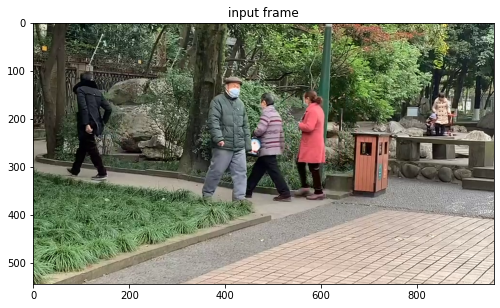

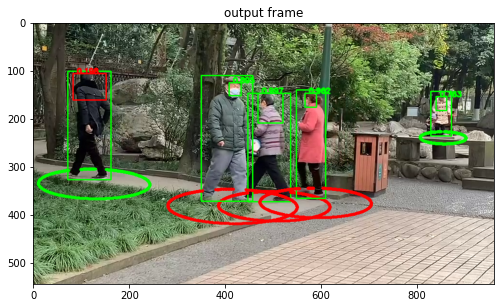

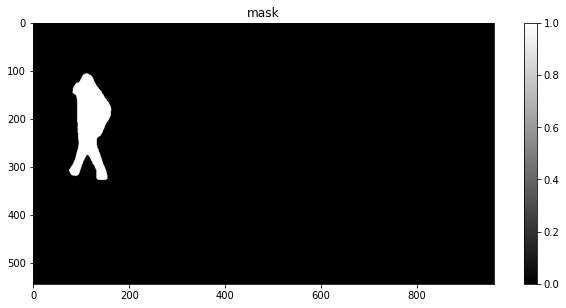

box and position: [ 72.10644 100.57884 162.1887  326.1865 ]
[117.14756775 326.18649292]
face location in the entire frame: [ 83 105 152 160]
human detection score: 0.9977684020996094
mask detection score: 0.19833436608314514


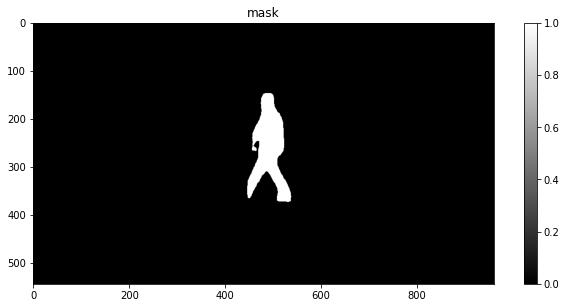

box and position: [447.20078 146.91719 536.9232  372.6677 ]
[492.06201172 372.66769409]
face location in the entire frame: [468 146 520 208]
human detection score: 0.9961131811141968
mask detection score: 0.9974073767662048


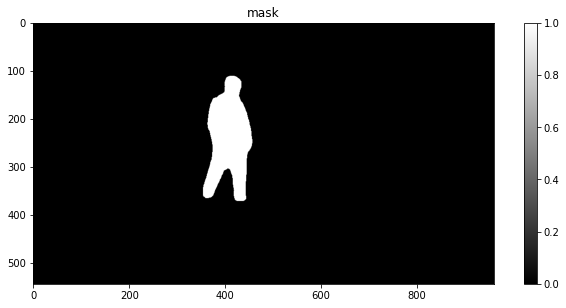

box and position: [350.22467 109.56999 457.2292  371.60587]
[403.72692871 371.60586548]
face location in the entire frame: [408.10969162 124.05115318 433.09937286 151.36810303]
human detection score: 0.9958510398864746
mask detection score: 0.8951022028923035


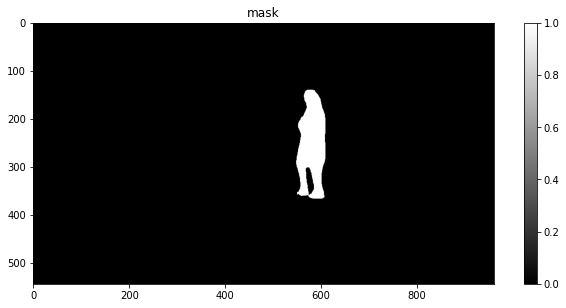

box and position: [548.06244 139.20517 609.0073  365.70428]
[578.53491211 365.70428467]
face location in the entire frame: [566.53908539 146.32701492 590.16960526 175.60276413]
human detection score: 0.9956583976745605
mask detection score: 0.9617859125137329


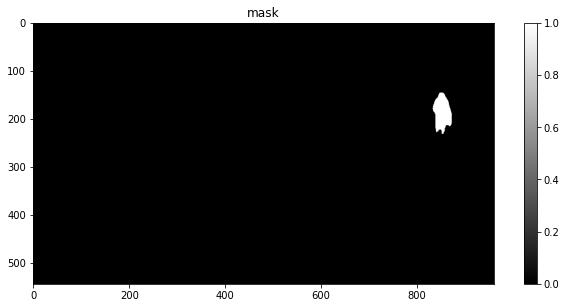

box and position: [828.6011  142.69936 871.50525 235.5071 ]
[850.05316162 235.50709534]
face location in the entire frame: [839.50116062 153.80076218 861.10494995 182.16947937]
human detection score: 0.476422518491745
mask detection score: 0.763092041015625


In [ ]:
cap, out = prepare_read_and_write(in_file, out_file)
ind = 0
while cap.isOpened():
  ind += 1
  ret, fr = cap.read()
  if ret:
    if(ind == 1250):
      fr_orig = cv.cvtColor(fr, cv.COLOR_BGR2RGB)
      fr = cv.cvtColor(fr, cv.COLOR_BGR2RGB).astype(np.float32) / 255
      frame = Frame(fr, None, model_detect, model_face, 0.2, frame_orig=fr_orig)
      frame.detect_people(True)
      demo(frame)
      break

In [ ]:
cap, out = prepare_read_and_write(in_file, out_file)


In [ ]:
print(dataset_faces[0]) # pay attention to the "dtype": when read from cv.imread(.) it's np.uint8;
# when processing it's np.float32 as input; in PyTorch it's torch.float32;
# when writing back to a video it's np.uint8
# np.uint8 -> np.float32: img.astype(np.float32) / 255
dataset_faces[0][0].dtype

(tensor([[[0.5333, 0.4784, 0.4667,  ..., 0.2078, 0.2078, 0.2078],
         [0.5333, 0.4980, 0.5176,  ..., 0.2078, 0.2078, 0.2078],
         [0.5255, 0.5137, 0.5608,  ..., 0.2118, 0.2118, 0.2118],
         ...,
         [0.9098, 0.9137, 0.9176,  ..., 0.8275, 0.8392, 0.8667],
         [0.9059, 0.9098, 0.9137,  ..., 0.8471, 0.8235, 0.8118],
         [0.8941, 0.8941, 0.8980,  ..., 0.8549, 0.7961, 0.7529]],

        [[0.4980, 0.4863, 0.5216,  ..., 0.1490, 0.1490, 0.1490],
         [0.4902, 0.4980, 0.5608,  ..., 0.1490, 0.1490, 0.1490],
         [0.4667, 0.4863, 0.5647,  ..., 0.1529, 0.1529, 0.1529],
         ...,
         [0.6980, 0.7020, 0.7059,  ..., 0.6549, 0.6667, 0.6863],
         [0.6980, 0.7020, 0.7059,  ..., 0.6980, 0.6627, 0.6471],
         [0.6863, 0.6863, 0.6902,  ..., 0.7176, 0.6510, 0.6039]],

        [[0.6196, 0.5373, 0.5569,  ..., 0.1294, 0.1294, 0.1294],
         [0.5569, 0.5059, 0.5451,  ..., 0.1294, 0.1294, 0.1294],
         [0.4784, 0.4471, 0.5098,  ..., 0.1333, 0.1333, 0

torch.float32

# Appendix A: UpSampler Header Net

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
import shutil
import random
import time
import torch
import torch.nn as nn
import torchvision.transforms as T

from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
from collections import defaultdict
from tqdm.notebook import tqdm
from torchvision import models

## Appendix A.1: Install Packages

In [ ]:
%%shell
pip install gdown
# gdown -O faces_augmented.zip https://drive.google.com/uc?id=17APGRS2NJgxiOsVM79jzu3Q3K5nJ7cmV
# unzip -q faces_augmented.zip
gdown -O face_dataset_all.zip https://drive.google.com/uc?id=1Jh68rJN65K_QsO9Af9qB9dzYA9Ji5PaT
unzip -q face_dataset_all.zip

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

## Appendix A.2: Prepare Dataset

In [ ]:
def get_mask_and_unmask_paths(masked_roots: list, unmasked_roots: list):
  masked, unmasked = [], []
  
  for path in masked_roots:
    for root, _, filenames in os.walk(path):
      for filename in filenames:
        masked.append(os.path.join(root, filename))
  
  for path in unmasked_roots:
    for root, _, filenames in os.walk(path):
      for filename in filenames:
        unmasked.append(os.path.join(root, filename))

  return masked, unmasked

# masked, unmasked = get_mask_and_unmask_paths(["./testing", "./testing_aug", 
#                                               "./with_mask", "./with_mask_aug"], 
#                                             ["without_mask", "without_mask_aug"])

masked, unmasked = get_mask_and_unmask_paths(["./face_dataset_all/masked", "./face_dataset_all/masked_aug"],  
                                              ["./face_dataset_all/unmasked", "./face_dataset_all/unmasked_aug"])
# masked, unmasked = get_mask_and_unmask_paths(["./with_mask", "./with_mask_aug"], 
#                                             ["without_mask", "without_mask_aug"])

In [ ]:
# masked: 1, unmasked: 0
class ResizedDataset(Dataset):
  def __init__(self, masked_paths: list, unmasked_paths: list, tgt_size: tuple):
    self.masked_paths = masked_paths
    self.unmasked_paths = unmasked_paths
    self.transform = T.Compose([
      T.ToPILImage(),
      T.ToTensor(),
      T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
      T.Resize(tgt_size)
    ])
  
  def __len__(self):
    return len(self.masked_paths) + len(self.unmasked_paths)
  
  def __getitem__(self, idx):
    num_masked, num_unmasked = len(self.masked_paths), len(self.unmasked_paths)
    assert idx < (num_masked + num_unmasked) and idx >= 0, "invalid index"
    path, label = None, -1
    if idx >= num_masked:
      idx -= num_masked
      path = self.unmasked_paths[idx]
      label = 0
    else:
      path = self.masked_paths[idx]
      label = 1
    
    # img = (cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB) / 255).astype(np.float32)
    img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)

    return self.transform(img), label

In [ ]:
def make_datasets(masked_paths: list, unmasked_paths: list, 
                  size_grads: list=[14,28]) -> dict:
    """
    For each image, find the closest size (L1-norm) from the size_grads and 
    resize it.

    Outputs:
      dataset_dict: {f"{7}": dataset_1, ...}, only including datasets of length
      > 0.
    """
    def argmin_dist(img_size) -> int:
      H, W = img_size
      min_dist = 2 ** 32
      out_size = None

      for size_cand in size_grads:
        cur_dist = abs(H - size_cand) + abs(W - size_cand)
        if min_dist > cur_dist:
          out_size = size_cand
          min_dist = cur_dist
      
      return out_size

    masked, unmasked = defaultdict(list), defaultdict(list)
    for path in masked_paths:
      try:
        img_size = cv.imread(path).shape[:2]
      except Exception as e:
        print(f"{path}, {e}")
        continue
      if max(size_grads) < 40 and min(img_size) >= 40:
        continue
      if max(size_grads) >=40 and min(img_size) < 40:
        continue
      out_size = argmin_dist(img_size) # output either 56*56 or 112*112
      masked[out_size].append(path)
    
    for path in unmasked_paths:
      try:
        img_size = cv.imread(path).shape[:2]
      except Exception as e:
        print(f"{path}, {e}")
        continue
      if max(size_grads) < 40 and min(img_size) >= 40:
        continue
      if max(size_grads) >=40 and min(img_size) < 40:
        continue
      out_size = argmin_dist(img_size)
      unmasked[out_size].append(path)

    dataset_dict = {}
    for key in size_grads:
      masked_paths_cur, unmasked_paths_cur = masked[key], unmasked[key]
      if max(size_grads) < 40:
        dataset_cur = ResizedDataset(masked_paths_cur, unmasked_paths_cur, (4*key, 4*key))
      else:
        dataset_cur = ResizedDataset(masked_paths_cur, unmasked_paths_cur, (key,key))
      if len(dataset_cur) > 0:
        dataset_dict[key] = dataset_cur
    
    return dataset_dict

In [ ]:
datasets_faces_dict = make_datasets(masked, unmasked,size_grads=[56,112,224])
datasets_faces_dict

./face_dataset_all/masked/.DS_Store, 'NoneType' object has no attribute 'shape'
./face_dataset_all/masked_aug/.DS_Store, 'NoneType' object has no attribute 'shape'
./face_dataset_all/unmasked/.DS_Store, 'NoneType' object has no attribute 'shape'


{56: <__main__.ResizedDataset at 0x7f7ffe4b6278>,
 112: <__main__.ResizedDataset at 0x7f7ffe57cda0>,
 224: <__main__.ResizedDataset at 0x7f7ffe57c198>}

In [ ]:
for key, val in datasets_faces_dict.items():
  print(f"{key}: {len(val)}")

56: 6390
112: 6115
224: 3302


In [ ]:
def make_dataloaders(datasets_dict, split=0.8, batch_size=16, 
                     num_workers=4) -> dict:
  """
  Outputs:
    data_loader_dict: {f"{7}": (train_loader_1, val_loader_1), ...}
  """
  data_loader_dict = {}
  for key, dataset in datasets_dict.items():
    ind_split = int(len(dataset) * split)
    train_ds, val_ds = random_split(dataset, [ind_split, len(dataset) \
                                              - ind_split])
    data_loader_dict[key] = (DataLoader(train_ds, batch_size, shuffle=True, 
                                        num_workers=num_workers), 
                             DataLoader(val_ds, batch_size, 
                                        num_workers=num_workers))
    
  return data_loader_dict

In [ ]:
data_loader_dict = make_dataloaders(datasets_faces_dict)
data_loader_dict

{56: (<torch.utils.data.dataloader.DataLoader at 0x7f7ffe61d0f0>,
  <torch.utils.data.dataloader.DataLoader at 0x7f7ffe61dd30>),
 112: (<torch.utils.data.dataloader.DataLoader at 0x7f7ffe61d908>,
  <torch.utils.data.dataloader.DataLoader at 0x7f7ffe365a58>),
 224: (<torch.utils.data.dataloader.DataLoader at 0x7f7ffe365be0>,
  <torch.utils.data.dataloader.DataLoader at 0x7f7ffe2b8208>)}

## Appendix A.3: UpSampler Model and A Test Model

In [ ]:
# based on DCGAN's upsampling part: 
# https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

class UpSampler(nn.Module):
  def __init__(self, size_grads=[14,28], in_channels=3, 
               num_features_init=8, tgt_size=224):
    # assert tgt_size == size_grads[-1] * 2, "wrong size_grads or tgt_dim"

    super(UpSampler, self).__init__()
    self.size_grads = size_grads
    self.tgt_size = tgt_size
    self.channel_increasers = nn.ModuleList()
    self.layers = nn.ModuleList()

    next_channels = in_channels
    cur_channels = num_features_init

    for _ in range(len(size_grads)):
      self.layers.insert(0, self.make_transpose_conv_block(cur_channels, 
                                                        next_channels))
      self.channel_increasers.insert(0, nn.Conv2d(in_channels, cur_channels, 1, 1, 
                                                  bias=False))
      next_channels = cur_channels
      cur_channels *= 2
    
  
  def make_transpose_conv_block(self, in_channels, out_channels):
    return nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, 4, 2, 1, bias=False),
        nn.BatchNorm2d(out_channels),
        nn.ReLU()
    )
  
  def forward(self, X):
    _, _, H, W = X.shape
    assert H == W, "H is not equal to W"
    if H == self.tgt_size:
      return X
    
    if max(self.size_grads) < 40: # small face model
      ind = self.size_grads.index(H/4)
    else:
      ind = self.size_grads.index(H) # large face model
    X = self.channel_increasers[ind](X)
    for i in range(ind, len(self.layers)):
      X = self.layers[i](X)
    
    return X

UpSampler takes a batch: (B, 3, H, W), where H and W can only be in the list `size_grad` AND H = W. The output's shape is (B, 3, 224, 224) where 224 is the target size which can be set separately.

`size_grad` is a list where candidate resize shapes are stored. The dataset class `ResizedDataset` and function `make_datasets(.)` takes an image, find the closest candidate resize shape (in $L_1$ norm), convert it to a Tensor and resize it. e.g. If an image is of shape (30, 34, 3), then it will be converted to a Tensor of shape (3, 28, 28).

The UpSampler takes an input batch and find the starting location to input. The structure of UpSampler consists of consecutive upsampling (ConvTranspose2d) layers; the respective layer dimensions of which are 7 -> 14, 14 -> 28, ..., 112 -> 224. For an input batch of shape (B, 3, 28, 28), it will start from the 28 -> 56 layer, leaving the front layers untrained. In this way, I hope to perserve the high resolution of the original image, and also hope to make the model learn correct way to upsample a low-resolution image to a high-resolution image since the error won't propagate all the way from the 7 -> 14 layer.

The Dataset and DataLoader are dictionaries. Please see a sample train in a later section.

In [ ]:
upsampler = UpSampler().to(device)
B = 10
X = torch.randn((B, 3, 112, 112)).to(device)
X = upsampler(X)
X.shape

torch.Size([10, 3, 224, 224])

In [ ]:
mobilemodel = models.mobilenet_v2(pretrained=True)

In [ ]:
class MaskModel(nn.Module):
  def __init__(self, size_grads=[14,28], in_channels=3, 
               num_features_init=8, tgt_size=224):
    super(MaskModel, self).__init__() # tgt_size is the input of the original model, 
                                      # e.g., ResNet, MobileNet, &etc.
    self.upsampler = UpSampler(size_grads=size_grads, in_channels=in_channels, 
                               num_features_init=num_features_init, 
                               tgt_size=tgt_size)
    
    ## TODO: replace the main network below
    # self.resizer = nn.Conv2d(in_channels, in_channels, tgt_size, 1)
    # self.fc = nn.Conv2d(in_channels, 2, 1, 1) # (B, 2, 1, 1)
    # self.out = nn.Softmax(dim=1)
    base_model = mobilemodel
    for param in base_model.parameters():
      param.requires_grad = False
    new_model = nn.Sequential(nn.Linear(in_features=1280, out_features=128),
                       nn.Dropout(p=0.5),
                       nn.Linear(in_features=128,out_features=2))
    base_model.classifier = new_model
    self.classifier = base_model
    # self.out = nn.Softmax(dim=1)
    ## end TODO

  def forward(self, X):
    X = self.upsampler(X)
    # X = self.resizer(X)
    # X = self.fc(X)
    X = self.classifier(X)
    if X.shape[0]!=1:
      X = X.squeeze()
    # X = self.out(X)

    return X

In [ ]:
model = MaskModel([56,112]).to(device)
B = 10
X = torch.randn((B, 3, 56, 56)).to(device)
X = model(X)
X.shape

torch.Size([10, 2])

## Appendix A.4: Training

In [ ]:
size = [56,112]
model = MaskModel(size_grads=size).to(device)
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam([param for param in model.parameters() if param.requires_grad])
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=5, gamma=0.1)

The Dataset is a dictionary in the form: {7: dataset of resized Tensors of shape (3, 7, 7), ...}; the DataLoader is also a dictionary: {7: (train loader, val loader)}

In [ ]:
def train(model, tr_loader, criterion, opt):
  model.train()

  loss_total = 0
  num_samples = 0
  acc_count = 0

  for i, (X, y) in tqdm(enumerate(tr_loader), total=len(tr_loader)):
    X, y = X.to(device), y.to(device)
    y = y.flatten()
    pred = model(X)
    loss = criterion(pred, y)
    opt.zero_grad()
    loss.backward()
    opt.step()

    loss_total += loss.data.cpu().item()
    _, pred_inds = torch.max(pred, dim=1)
    acc_count += (pred_inds == y).sum().item()
    num_samples += y.shape[0]

  # scheduler.step()
  return loss_total / num_samples, acc_count / num_samples

def validate(model, val_loader, criterion):
  model.eval()

  loss = 0
  num_samples = 0
  acc_count = 0

  with torch.no_grad():
    for i, (X, y) in tqdm(enumerate(val_loader), total=len(val_loader)):
      X, y = X.to(device), y.to(device)
      pred = model(X)
      loss += criterion(pred, y).data.cpu().item()
      _, pred_inds = torch.max(pred, dim=1)
      acc_count += (pred_inds == y).sum().item()
      num_samples += y.shape[0]
      
  model.train()
  return loss / num_samples, acc_count / num_samples

In [ ]:
def run(model, dataloaders_dict, criterion, opt, scheduler, num_epochs=5):
  trl_hist, tracc_hist, vall_hist, valacc_hist = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

  for epoch in range(num_epochs):
    print(f"epoch {epoch + 1}/{num_epochs}")

    for key, dataloaders in dataloaders_dict.items():
      print(f"current key: {key}, epoch {epoch + 1}/{num_epochs}")
      tr_dl, val_dl = dataloaders
      tr_loss, tr_acc = train(model, tr_dl, criterion, opt)
      val_loss, val_acc = validate(model, val_dl, criterion)

      print(f"train loss: {tr_loss}, acc: {tr_acc}; val loss: {val_loss}, acc: {val_acc}")
      trl_hist[key].append(tr_loss)
      tracc_hist[key].append(tr_acc)
      vall_hist[key].append(val_loss)
      valacc_hist[key].append(val_acc)
      
    scheduler.step()
  return trl_hist, tracc_hist, vall_hist, valacc_hist

In [ ]:
trl_hist, tracc_hist, vall_hist, valacc_hist = run(model, data_loader_dict, criterion, opt, exp_lr_scheduler, num_epochs=15)

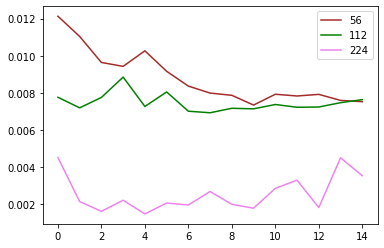

In [ ]:
# plot train, validation loss
import matplotlib.pyplot as plt
which2plot = vall_hist
cmap = {"14":"black","28":"blue","56":"brown","112":"green","224":"violet"}

for key, hist in vall_hist.items():
  plt.plot(range(15),hist,color=cmap[str(key)],label=str(key))
plt.legend(loc="best")
plt.show()

## Appendix A.5: Prediction

In [ ]:
%%shell
gdown -O face_cut.zip https://drive.google.com/uc?id=1O6z-x6XJw2iWYqHD-pscIPRPjz0JrlzQ
unzip -q face_cut.zip

In [ ]:
def get_paths(base_root):
  filenames_out = []
  for root, _, filenames in os.walk(base_root):
    for filename in filenames:
      filenames_out.append(os.path.join(root, filename))
  
  return filenames_out

pred_paths = get_paths("./face_dataset_all/masked")
len(pred_paths)

3933

In [ ]:
next(iter(data_loader_dict[]))

16575

In [ ]:
# The model seems unable to predict for a single image. Please suggest about how
# to fix this. To wind about this issue, I predict for 2 identical images and
# only return the prediction for the first one.

def predict(model, path, size_grads=[14,28], 
            if_plot=False, num = 2):
  """
  inputs:
    img: ndarray, dtype = np.uint8, in RGB
  """
  def argmin_dist(img_size) -> int:
      H, W = img_size
      min_dist = 2 ** 32
      out_size = None

      for size_cand in size_grads:
        cur_dist = abs(H - size_cand) + abs(W - size_cand)
        if min_dist > cur_dist:
          out_size = size_cand
          min_dist = cur_dist
      
      return out_size
  
  model.eval()
  soft = nn.LogSoftmax(dim=1)
  

  image = []
  score = []
  cnt = 0
  while cnt < 2:
    imgpath = random.choice(path)
    img = cv.cvtColor(cv.imread(imgpath), cv.COLOR_BGR2RGB)
    if max(size_grads) < 40 and min(img.shape[:2]) > 40:
      continue
    if max(size_grads) > 40 and min(img.shape[:2]) < 40:
      continue
    image.append(img)

    if max(size_grads) < 40:
      out_size = 4*argmin_dist(img.shape[:2])
    else:
      out_size = argmin_dist(img.shape[:2])

    # print(f"out_size: {out_size}")
    transformer = Compose([
      ToPILImage(),
      ToTensor(),
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
      Resize((out_size, out_size))
    ])
    X = transformer(img).unsqueeze(0).to(device)
    with torch.no_grad():
      pred = soft(model(X)).squeeze()
      # print(f"pred's shape: {pred.shape}")
      pred_score, pred_ind = torch.max(pred, dim=0)
      pred_score, pred_ind = pred_score.item(), pred_ind.item()
    cnt += 1
    score.append(np.exp(pred.data.cpu().numpy().tolist()[1]))

  if if_plot:
    labels = ["unmasked", "masked"]
    # plt.imshow(img)
    # plt.title(f"score: {pred_score}, label: {labels[pred_ind]}, " + \
    #           f"pred: {pred.data.cpu().numpy().tolist()}")
    # plt.show()
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(image[0])
    ax[0].set_title(f"prob mask: {score[0]: .3f}\n" + \
                 f"image size: {image[0].shape[0]} * {image[0].shape[1]}")
    ax[0].axis("off")
    ax[1].imshow(image[1])
    ax[1].set_title(f"prob mask: {score[1]: .3f}\n" + \
                 f"image size: {image[1].shape[0]} * {image[1].shape[1]}")
    ax[1].axis("off")
  return ax

In [ ]:
test_model_S = MaskModel(size_grads=[14,28])
test_model_S.load_state_dict(torch.load("./model_test_full_small.pt"))
test_model_S.to(device)
test_model_S.eval()
pred_paths = get_paths("./face_dataset_all/masked")

In [ ]:
test_model_B = MaskModel(size_grads=[56,112])
test_model_B.load_state_dict(torch.load("./model_test_full_big.pt"))
test_model_B.to(device)
test_model_B.eval()
pred_paths = get_paths("./face_dataset_all/masked")

In [ ]:
big_image = []
cnt = 0
while cnt < 2:
  path = random.choice(pred_paths)
  img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
  if min(img.shape[:2]) < 40:
    continue
  # ax = predict(model = test_model,img = img, if_plot = True)
  big_image.append(img)
  cnt += 1

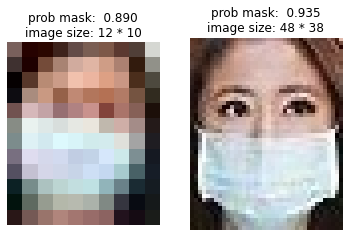

In [ ]:
ax = predict(model = test_model_S, path = pred_paths, size_grads=[14,28], if_plot=True, num = 2)

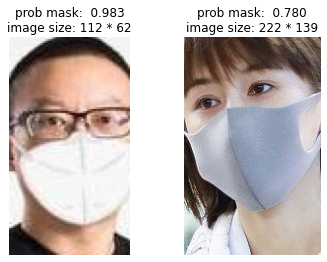

In [ ]:
ax = predict(model = test_model_B, path = pred_paths, size_grads=[56,112], if_plot=True, num = 2)

In [ ]:
torch.save(model.state_dict(), "./model_test_full_big.pt")
new_model = model

In [ ]:
%%shell
# gdown -O model_test.pt https://drive.google.com/uc?id=1cASKR5NVPMm2SOaqNjPWJxXulsFyusWO
# gdown -O model_test.pt https://drive.google.com/uc?id=1jv4WFEelRJcspnUF5nOStgmTdmVwDIls
gdown -O model_test_scheduler.pt https://drive.google.com/uc?id=16aZfoKsFCJsSD6QZTOWvjZRLnrqHePYD

In [ ]:
new_model = MaskModel()
new_model.load_state_dict(torch.load("./model_test_scheduler_big.pt"))
new_model = new_model.eval().to(device)

out_size: 224
X's shape: torch.Size([1, 3, 224, 224])
pred's shape: torch.Size([2])


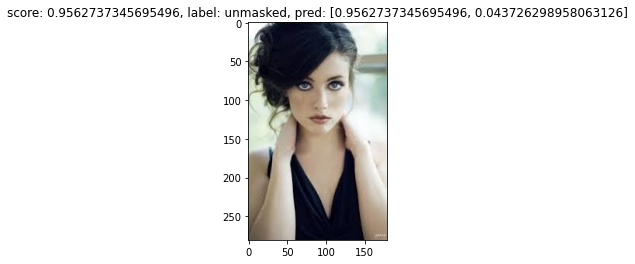

In [ ]:
pred_paths = get_paths("./without_mask")
path = random.choice(pred_paths)
img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
pred_score, pred_ind = predict(new_model, img, if_plot=True)

#  Appendix B: Calculate the Homography Matrix H

In [ ]:
import cv2 as cv
cap, out = prepare_read_and_write(in_file, out_file)
ret, fr = cap.read()
count = 0
while cap.isOpened():
  ret, fr = cap.read()
  if count == 150:
    cv2.imwrite("frame%d.jpg" % count, fr)
  count += 1 cap, out = prepare_read_and_write(in_file, out_file)

In [ ]:
img1 = cv2.imread('label.jpg')
img2 = cv2.imread('frame150.jpg')
height, width = img2.shape[:2]
height,width

(544, 960)

In [ ]:
import IPython
IPython.display.HTML('./point_tracker3.html')

In [ ]:
P1 = np.array([[404, 193], [554, 193], [403, 336], [553, 333], [454, 241], [503, 288]])
P2 = np.array([[413, 495], [494, 506], [366, 514], [455, 527], [422, 505], [438, 516]])

A = np.zeros([12,8])
Y = np.zeros([12,1])
for i in range(6):
  x = P1[i][0]
  y = P1[i][1]
  x_ = P2[i][0]
  y_ = P2[i][1]
  A[0+2*i] = np.array([x,y,1,0,0,0,-x*x_,-x_*y])
  A[1+2*i] = np.array([0,0,0,x,y,1,-x*y_,-y*y_])
  Y[0+2*i] = np.array([x_])
  Y[1+2*i] = np.array([y_])

X = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),Y)
X
H =np.zeros([3,3])
for i in range(3):
  for j in range(3):
    if(3*i+j<8):
      H[i,j] = X[3*i+j]
    else:
      H[i,j] = 1.0
H

array([[ 5.35371621e-02, -4.30821635e-01,  3.25425811e+02],
       [-2.59824540e-01, -2.35951346e-01,  4.67802688e+02],
       [-5.96944809e-04, -6.15687486e-04,  1.00000000e+00]])

In [ ]:
invH = np.linalg.inv(H)
invH

array([[ 2.99591755e+00,  1.32601624e+01, -7.17808850e+03],
       [-1.11783058e+00,  1.42577124e+01, -6.30602526e+03],
       [ 1.10016313e-03,  1.66938802e-02, -7.16746351e+00]])

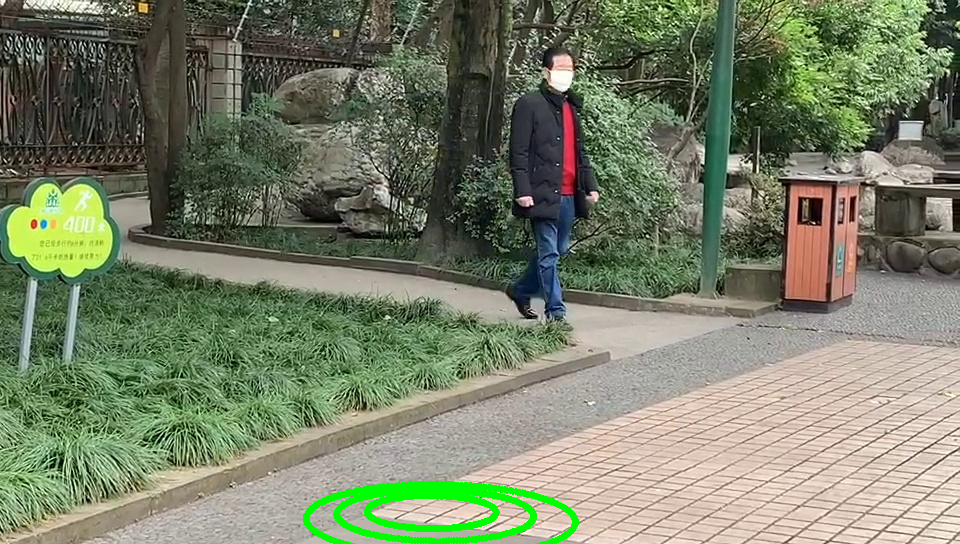

In [ ]:
#for each point in the circle, do the homograhpy and draw the new ellipse on the scene
x_cen = 477
y_cen = 265
radius = 200
num_points = 500
points_on_circle = np.zeros((3,num_points))
i = 0
for theta in np.linspace(0, 2*pi, num_points):
  points_on_circle[0,i] = x_cen + radius * cos(theta)
  points_on_circle[1,i] = y_cen - radius * sin(theta)
  points_on_circle[2,i] = 1.0
  i = i+1
points_on_ellipse = H @ points_on_circle

points_on_ellipse /= points_on_ellipse[2,:]
pts = points_on_ellipse[:2,:]


for i in range(num_points):
  pt = pts[:,i]
  x = int(pt[0])
  y = int(pt[1])

  img2 = cv2.circle(img2, (x,y), radius=3, color=(0, 255, 0), thickness=-1)

cv2_imshow(img2)

In [ ]:
# get H_prime
P2 = np.array([[404, 193], [554, 193], [403, 336], [553, 333], [454, 241], [503, 288]])
P1 = np.array([[413, 495], [494, 506], [366, 514], [455, 527], [422, 505], [438, 516]])

A = np.zeros([12,8])
Y = np.zeros([12,1])
for i in range(6):
  x = P1[i][0]
  y = P1[i][1]
  x_ = P2[i][0]
  y_ = P2[i][1]
  A[0+2*i] = np.array([x,y,1,0,0,0,-x*x_,-x_*y])
  A[1+2*i] = np.array([0,0,0,x,y,1,-x*y_,-y*y_])
  Y[0+2*i] = np.array([x_])
  Y[1+2*i] = np.array([y_])

X = np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),Y)
X
H_prime =np.zeros([3,3])
for i in range(3):
  for j in range(3):
    if(3*i+j<8):
      H_prime[i,j] = X[3*i+j]
    else:
      H_prime[i,j] = 1.0
H_prime

array([[-5.02078525e-01, -2.19026056e+00,  1.17121129e+03],
       [ 2.38594728e-01, -2.50882573e+00,  1.08701675e+03],
       [-8.88316345e-05, -2.54869230e-03,  1.00000000e+00]])